In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.shape

(10000, 14)

In [5]:
df.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# End goal is how to build artificial neural network using Keras

In [14]:
# one-hot encoding

df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [15]:
# while buillding a neural network scale the values as weights value might not converge soon if not scaled.

In [16]:
X = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42
                                                   )

In [17]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
X_train.shape

(8000, 11)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [21]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [37]:
import tensorflow

In [38]:
from tensorflow import keras

In [39]:
from tensorflow.keras import Sequential     # in Keras you can build Sequential and Non-Sequential models

In [40]:
from tensorflow.keras.layers import Dense

In [41]:
from tensorflow.keras.layers import Input, Dense

In [60]:
model = Sequential()

model.add(Input(shape=(11,)))    # <-- पहले input layer
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# complilation stage mein batana hota hai konsa loss function and optimization function use karoge.

In [63]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy']) # binary_cross_entropy = log_loss

In [72]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2) # training model 

# training and validation accuracy should align, if one decreses/increases other should also decreses/increases. If it doesn't work like that then it is case of overfitting.

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8660 - loss: 0.3235 - val_accuracy: 0.8562 - val_loss: 0.3455
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8728 - loss: 0.3178 - val_accuracy: 0.8587 - val_loss: 0.3455
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8642 - loss: 0.3206 - val_accuracy: 0.8600 - val_loss: 0.3467
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8654 - loss: 0.3196 - val_accuracy: 0.8612 - val_loss: 0.3464
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8682 - loss: 0.3206 - val_accuracy: 0.8575 - val_loss: 0.3468
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8676 - loss: 0.3199 - val_accuracy: 0.8525 - val_loss: 0.3493
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8644 - loss: 0.3202 - val_accuracy: 0.8569 - val_loss: 0.3462
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8704 - loss: 0.3200 - val_accu

In [73]:
import matplotlib.pyplot as plt

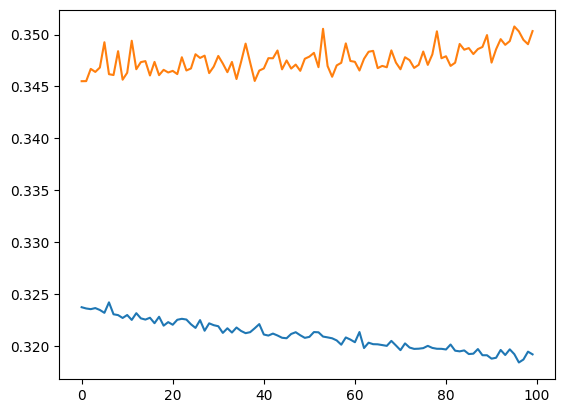

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

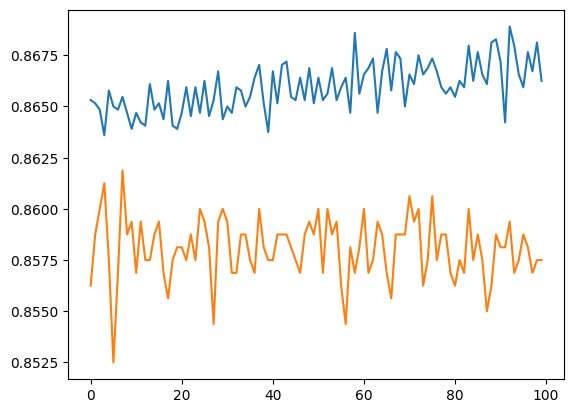

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [65]:
model.layers[0].get_weights()

[array([[-0.00638383, -0.03346476, -0.23955598, -0.04354495,  0.45561278,
         -0.13676895, -0.07731655, -0.04860241, -0.05435586, -0.11085171,
          0.18446375],
        [ 0.8228901 , -0.56613284,  0.01690917, -0.23414995, -0.8967786 ,
         -0.07102757,  0.77437055, -0.01597321, -0.3822982 ,  0.9313295 ,
         -0.2926051 ],
        [ 0.29733267,  0.3771013 ,  0.15456398,  0.75229675, -0.04300681,
          0.29427   ,  0.01073828, -0.3194312 , -0.41247565, -0.04409672,
         -0.10289992],
        [-0.69294524, -0.28840846, -0.41241363, -0.39403322, -0.10582716,
         -0.09637743, -0.33309022, -0.33839798, -0.24805507,  0.22961195,
         -0.08277953],
        [-0.04831804, -0.22125249,  0.03967142,  0.00179322, -0.3463925 ,
          1.0166805 , -0.6750541 , -1.0208914 ,  0.3968424 ,  0.99598944,
          0.26731622],
        [-0.31947735,  0.14113005, -0.040794  , -0.89702684,  0.76812327,
         -0.3314358 ,  0.10496569, -0.06323353,  0.09776796, -0.0452815

In [66]:
model.layers[1].get_weights()

[array([[ 0.29295835, -0.264775  , -0.18236919, -0.53613484,  0.7138712 ,
         -0.28497493,  0.6916056 ,  0.09284681, -0.21976562,  0.48093566,
         -0.04364148],
        [ 0.41491488,  0.18522468, -0.15822625, -0.20013596,  0.12907617,
         -0.4273694 , -0.08856595, -0.41182804,  0.15248607, -0.00417926,
         -0.49649966],
        [-0.4836534 , -0.29061317,  0.40782017,  0.84797513, -0.11525819,
          0.01440392,  0.44387388, -0.01948629,  0.2122256 ,  0.00993022,
          0.49081904],
        [ 0.72092813, -0.57990366,  0.17425406,  0.0170537 , -1.072516  ,
         -0.37952295,  0.29407665, -0.07548845,  0.42705175,  0.24126741,
          0.41794288],
        [ 0.25669676, -0.36551842,  0.32221174,  0.36040157, -0.14650315,
         -0.03373704,  0.16299826,  0.32413775, -0.6899338 ,  0.31273425,
          0.15575545],
        [-0.38668564, -0.3429318 ,  0.21382104,  0.3228201 , -0.06260788,
          0.69567204, -0.457264  ,  0.01559398, -0.00759511, -0.2395480

In [67]:
model.layers[2].get_weights()

[array([[ 0.65784997],
        [ 0.50300306],
        [-0.6452581 ],
        [-0.4832111 ],
        [-0.63154024],
        [ 1.1988802 ],
        [-0.2821745 ],
        [-0.26978815],
        [-0.99175286],
        [-0.6421369 ],
        [ 0.805309  ]], dtype=float32),
 array([-0.12203664], dtype=float32)]

In [68]:
y_log = model.predict(X_test_scaled) #here sigmoid is used so it gives answer between 0 and 1. So, we have to set threshold

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [69]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8535